# Spotify My Saved Albums Analysis

Inspiration and code snippets from: [Jonathan Cabreira, A-Music-Taste-Analysis-Using-Spotify-API-and-Python](https://github.com/jmcabreira/A-Music-Taste-Analysis-Using-Spotify-API-and-Python.)

CSV file was generated with the custom script `spotipy-music-explorer.py`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

In [137]:
df = pd.read_csv('spotify-features-cate.csv')
# df = pd.read_csv('spotify-features-anti.csv')
pd.set_option('display.max_rows', None)

df.shape  # num tracks x num dimensions

(2555, 23)

## Inspect dataset

In [138]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'name', 'album', 'year', 'artist',
       'album_popularity'],
      dtype='object')

In [139]:
df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,name,album,year,artist,album_popularity
0,0.215,0.444,1,-16.014,1,0.0485,0.920000,0.999,0.7930,0.0376,...,spotify:track:3YCsdyb6McJe5VDtycTvf2,https://api.spotify.com/v1/tracks/3YCsdyb6McJe...,https://api.spotify.com/v1/audio-analysis/3YCs...,41093,4,Human (Intro),Morbid Tales,1984,Celtic Frost,39
1,0.146,0.962,11,-7.394,0,0.0763,0.000002,0.876,0.5900,0.2600,...,spotify:track:4xQO8MVtFZOW2KJMBuAB2p,https://api.spotify.com/v1/tracks/4xQO8MVtFZOW...,https://api.spotify.com/v1/audio-analysis/4xQO...,219173,4,Into the Crypts of Rays,Morbid Tales,1984,Celtic Frost,39
2,0.181,0.926,2,-7.303,1,0.0588,0.000001,0.916,0.0792,0.1630,...,spotify:track:4UUCdlHYcQifK8x8qcK3ca,https://api.spotify.com/v1/tracks/4UUCdlHYcQif...,https://api.spotify.com/v1/audio-analysis/4UUC...,288933,4,Visions of Mortality,Morbid Tales,1984,Celtic Frost,39


## Preprocessing

In [140]:
features = df.loc[: ,['acousticness', 
                      'danceability',
                      'energy',
                      'instrumentalness',
                      'liveness',
                      'speechiness',
                      'valence']]

## Plots

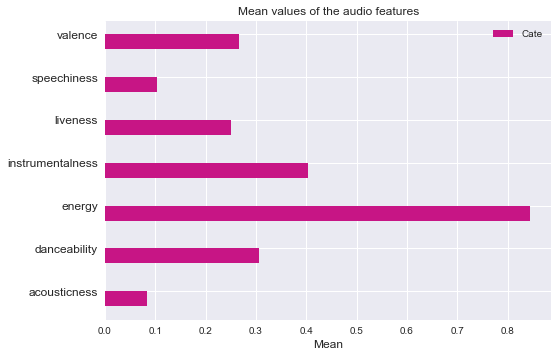

In [141]:
# Horizontal barplot of features

# Number of features
N = len(features.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
# Bar plot with my list
plt.barh(ind, features.mean(), width, label='Cate', color='mediumvioletred')

plt.xlabel('Mean', fontsize=12)
plt.title('Mean values of the audio features')
plt.yticks(ind + width / 2, (list(features)[:]), fontsize=12)
plt.legend(loc='best')
plt.rcParams['figure.figsize'] =(8,8)
style.use("ggplot")

plt.show()

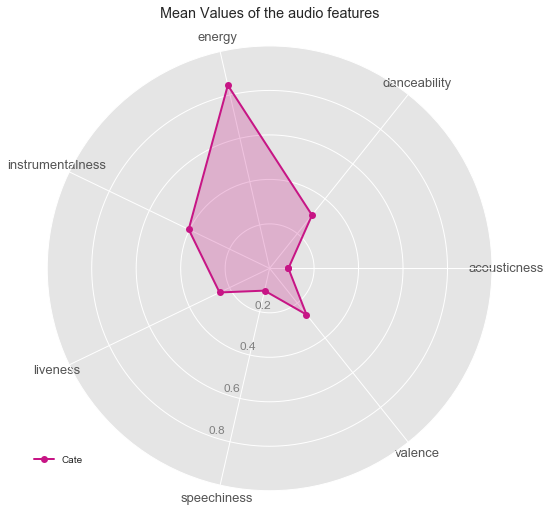

In [142]:
# Polar plot of features

labels = list(features)[:]
stats = features.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

fig = plt.figure(figsize=(18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label="Cate", color='mediumvioletred')
ax.fill(angles, stats, alpha=0.25, facecolor='mediumvioletred')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize=13)

ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="gray", size=12)
plt.ylim(0,1)

ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1));

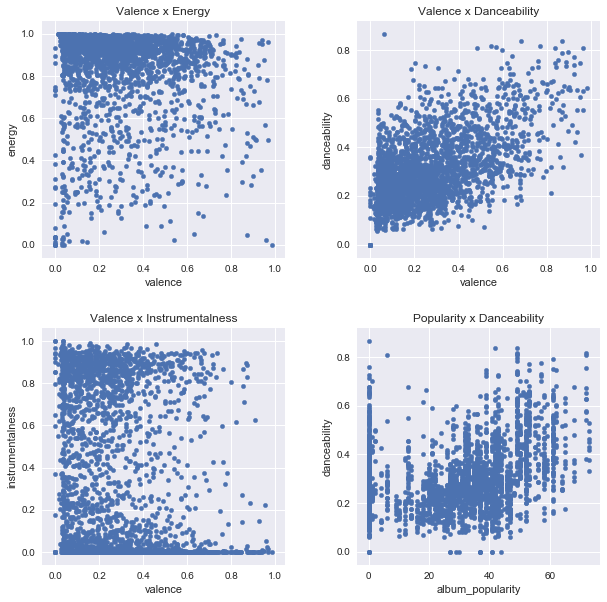

In [143]:
# Scatterplot to check correlations between features

fig = plt.figure(figsize=(10,10))
style.use('seaborn')

ax1 = fig.add_subplot(221)
df.plot(kind='scatter', x='valence', y='energy', ax=ax1, title='Valence x Energy')
ax2 = fig.add_subplot(222)
df.plot(kind='scatter', x='valence', y='danceability', ax=ax2, title='Valence x Danceability')
ax3 = fig.add_subplot(223)
df.plot(kind='scatter', x='valence', y='instrumentalness', ax=ax3, title='Valence x Instrumentalness')
ax4 = fig.add_subplot(224)
df.plot(kind='scatter', x='album_popularity', y='danceability', ax=ax4, title='Popularity x Danceability')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### Features over time

**Caveat**: many albums are mistakenly dated with the year of the album's reissue or special edition!

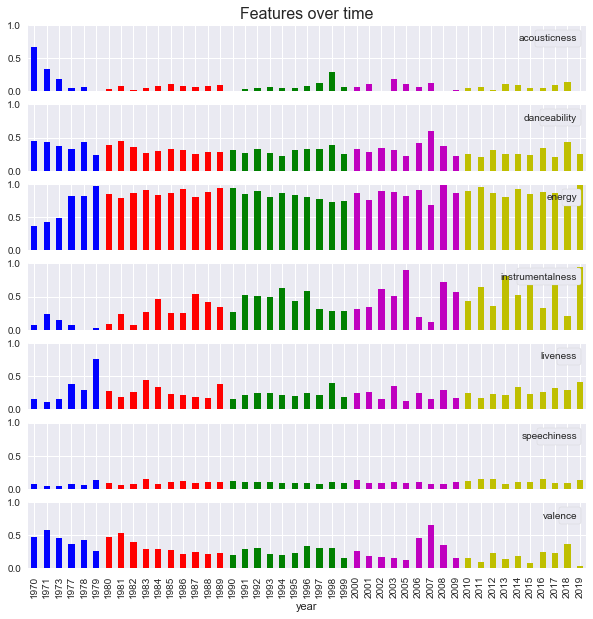

In [144]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10,10))

# Group data by year
df_new = df.groupby('year').mean()
years = list(df_new.index)
labels = list(features)[:]

# Build colormap to demarcate the decades
colors = np.array(['b'] * len(df_new))
colors[df_new.index >= 1980] = 'r'
colors[df_new.index >= 1990] = 'g'
colors[df_new.index >= 2000] = 'm'
colors[df_new.index >= 2010] = 'y'

axes[0].set_title('Features over time', size=16)
for ix, (dim, ax) in enumerate(zip(labels, axes)):    
    df_new.plot(kind='bar', y=dim, ax=ax, color=colors)
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right', frameon=True, handletextpad=-2.0, handlelength=0, framealpha=1.0)
    if ix < len(axes)-1:
        ax.set_xticklabels([])
        ax.set_xlabel('')
        
ax.set_xlabel('year')
plt.show()

In [145]:
# from https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html

def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

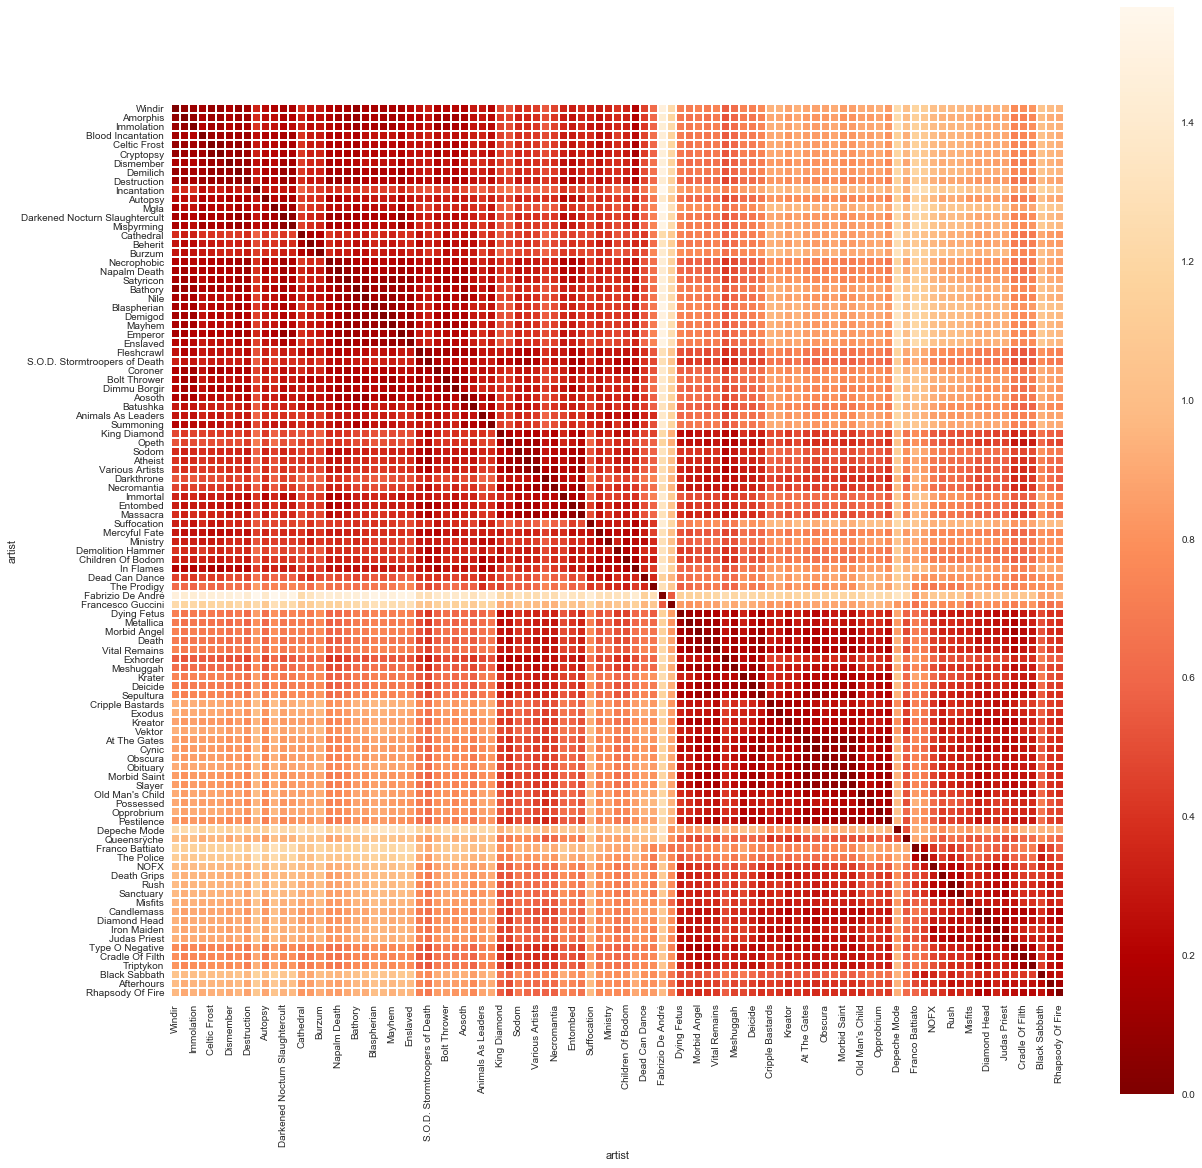

In [147]:
# Calculate the most similar album to a given album

from scipy.spatial.distance import squareform, pdist
import seaborn as sns
from fastcluster import linkage

# Similarity features
similarity_features = [
    'acousticness', 
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'speechiness',
    'valence',
#     'tempo',
#     'loudness',
#     'key',
#     'time_signature'
]

# Group by artist
df_artist = df.groupby(['artist']).median()
feat_mat = df_artist.loc[:, similarity_features]
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(squareform(pdist(feat_mat)), method='ward')
similarity_matrix = pd.DataFrame(ordered_dist_mat, columns=df_artist.index[res_order], index=df_artist.index[res_order])

plt.figure(figsize=(20,20))
sns.heatmap(similarity_matrix, cmap='OrRd_r', linewidth=1, square=True)
plt.show();
